# Data Processing

In [34]:
import math
import warnings
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#read in data with correct column titles
original_df = pd.read_csv("../Documents/Scats Data October 2006.csv", skiprows=[0])
original_df.head

<bound method NDFrame.head of       SCATS Number                         Location CD_MELWAY  NB_LATITUDE  \
0              970  WARRIGAL_RD N of HIGH STREET_RD   060 G10    -37.86703   
1              970  WARRIGAL_RD N of HIGH STREET_RD   060 G10    -37.86703   
2              970  WARRIGAL_RD N of HIGH STREET_RD   060 G10    -37.86703   
3              970  WARRIGAL_RD N of HIGH STREET_RD   060 G10    -37.86703   
4              970  WARRIGAL_RD N of HIGH STREET_RD   060 G10    -37.86703   
...            ...                              ...       ...          ...   
4187          4821      VICTORIA_ST W OF BURNLEY_ST   002HF02    -37.81296   
4188          4821      VICTORIA_ST W OF BURNLEY_ST   002HF02    -37.81296   
4189          4821      VICTORIA_ST W OF BURNLEY_ST   002HF02    -37.81296   
4190          4821      VICTORIA_ST W OF BURNLEY_ST   002HF02    -37.81296   
4191          4821      VICTORIA_ST W OF BURNLEY_ST   002HF02    -37.81296   

      NB_LONGITUDE  HF VicRoads I

In [36]:
original_df.columns.tolist()

['SCATS Number',
 'Location',
 'CD_MELWAY',
 'NB_LATITUDE',
 'NB_LONGITUDE',
 'HF VicRoads Internal',
 'VR Internal Stat',
 'VR Internal Loc',
 'NB_TYPE_SURVEY',
 'Date',
 'V00',
 'V01',
 'V02',
 'V03',
 'V04',
 'V05',
 'V06',
 'V07',
 'V08',
 'V09',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95']

In [37]:
essential_cols = ["SCATS Number", "Date", "NB_LATITUDE", "NB_LONGITUDE"]

In [38]:
import re

time_cols = [col for col in original_df.columns if re.match(r"^V\d{2}$", col)]

print(f"time columns: {len(time_cols)}")


time columns: 96


In [39]:
df_raw = original_df[essential_cols + time_cols]
df_raw.head()

,SCATS Number,Date,NB_LATITUDE,NB_LONGITUDE,V00,V01,V02,V03,V04,V05,...,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95
0,970,10/1/2006,-37.86703,145.09159,86,83,52,58,59,44,...,114,97,97,66,81,50,59,47,29,34
1,970,10/2/2006,-37.86703,145.09159,32,28,17,11,7,11,...,111,102,107,114,80,60,62,48,44,26
2,970,10/3/2006,-37.86703,145.09159,26,32,21,14,10,12,...,130,132,114,86,93,90,73,57,29,40
3,970,10/4/2006,-37.86703,145.09159,32,22,28,13,16,8,...,115,113,132,101,113,90,78,66,52,44
4,970,10/5/2006,-37.86703,145.09159,40,39,21,11,16,9,...,171,120,116,113,99,91,61,55,49,36


In [40]:
df_melted = df_raw.melt(
    id_vars=["SCATS Number", "Date", "NB_LATITUDE", "NB_LONGITUDE"],
    value_vars=time_cols,
    var_name="Interval",
    value_name="Traffic_flow"
)

df_melted.head()

,SCATS Number,Date,NB_LATITUDE,NB_LONGITUDE,Interval,Traffic_flow
0,970,10/1/2006,-37.86703,145.09159,V00,86
1,970,10/2/2006,-37.86703,145.09159,V00,32
2,970,10/3/2006,-37.86703,145.09159,V00,26
3,970,10/4/2006,-37.86703,145.09159,V00,32
4,970,10/5/2006,-37.86703,145.09159,V00,40


In [41]:
def interval_to_time(interval_code):
    idx = int(interval_code[1:])
    hour = idx // 4
    minute = (idx % 4) * 15
    return f"{hour:02d}:{minute:02d}"

df_melted["Time"] = df_melted["Interval"].apply(interval_to_time)
df_melted = df_melted.drop(columns=["Interval"])

df_melted.head(10)


,SCATS Number,Date,NB_LATITUDE,NB_LONGITUDE,Traffic_flow,Time
0,970,10/1/2006,-37.86703,145.09159,86,00:00
1,970,10/2/2006,-37.86703,145.09159,32,00:00
2,970,10/3/2006,-37.86703,145.09159,26,00:00
3,970,10/4/2006,-37.86703,145.09159,32,00:00
4,970,10/5/2006,-37.86703,145.09159,40,00:00
5,970,10/6/2006,-37.86703,145.09159,36,00:00
6,970,10/7/2006,-37.86703,145.09159,62,00:00
7,970,10/8/2006,-37.86703,145.09159,116,00:00
8,970,10/9/2006,-37.86703,145.09159,23,00:00
9,970,10/10/2006,-37.86703,145.09159,27,00:00


In [42]:
df_melted.tail()

,SCATS Number,Date,NB_LATITUDE,NB_LONGITUDE,Traffic_flow,Time
402427,4821,10/27/2006,-37.81296,145.0083,88,23:45
402428,4821,10/28/2006,-37.81296,145.0083,107,23:45
402429,4821,10/29/2006,-37.81296,145.0083,45,23:45
402430,4821,10/30/2006,-37.81296,145.0083,62,23:45
402431,4821,10/31/2006,-37.81296,145.0083,54,23:45


In [43]:
df_melted

,SCATS Number,Date,NB_LATITUDE,NB_LONGITUDE,Traffic_flow,Time
0,970,10/1/2006,-37.86703,145.09159,86,00:00
1,970,10/2/2006,-37.86703,145.09159,32,00:00
2,970,10/3/2006,-37.86703,145.09159,26,00:00
3,970,10/4/2006,-37.86703,145.09159,32,00:00
4,970,10/5/2006,-37.86703,145.09159,40,00:00
...,...,...,...,...,...,...
402427,4821,10/27/2006,-37.81296,145.00830,88,23:45
402428,4821,10/28/2006,-37.81296,145.00830,107,23:45
402429,4821,10/29/2006,-37.81296,145.00830,45,23:45
402430,4821,10/30/2006,-37.81296,145.00830,62,23:45


In [44]:
df_melted["Datetime"] = pd.to_datetime(df_melted["Date"] + " " + df_melted["Time"])

df_melted.head(10)

,SCATS Number,Date,NB_LATITUDE,NB_LONGITUDE,Traffic_flow,Time,Datetime
0,970,10/1/2006,-37.86703,145.09159,86,00:00,2006-10-01
1,970,10/2/2006,-37.86703,145.09159,32,00:00,2006-10-02
2,970,10/3/2006,-37.86703,145.09159,26,00:00,2006-10-03
3,970,10/4/2006,-37.86703,145.09159,32,00:00,2006-10-04
4,970,10/5/2006,-37.86703,145.09159,40,00:00,2006-10-05
5,970,10/6/2006,-37.86703,145.09159,36,00:00,2006-10-06
6,970,10/7/2006,-37.86703,145.09159,62,00:00,2006-10-07
7,970,10/8/2006,-37.86703,145.09159,116,00:00,2006-10-08
8,970,10/9/2006,-37.86703,145.09159,23,00:00,2006-10-09
9,970,10/10/2006,-37.86703,145.09159,27,00:00,2006-10-10


In [45]:
columns_to_drop = ["Date", "Time"]
df_melted = df_melted.drop(columns=[col for col in columns_to_drop if col in df_melted.columns])
df_melted.head(10)

,SCATS Number,NB_LATITUDE,NB_LONGITUDE,Traffic_flow,Datetime
0,970,-37.86703,145.09159,86,2006-10-01
1,970,-37.86703,145.09159,32,2006-10-02
2,970,-37.86703,145.09159,26,2006-10-03
3,970,-37.86703,145.09159,32,2006-10-04
4,970,-37.86703,145.09159,40,2006-10-05
5,970,-37.86703,145.09159,36,2006-10-06
6,970,-37.86703,145.09159,62,2006-10-07
7,970,-37.86703,145.09159,116,2006-10-08
8,970,-37.86703,145.09159,23,2006-10-09
9,970,-37.86703,145.09159,27,2006-10-10


In [46]:
print(df_melted.isna().sum())




SCATS Number    0
NB_LATITUDE     0
NB_LONGITUDE    0
Traffic_flow    0
Datetime        0
dtype: int64


In [47]:
df_melted.to_csv("../Documents/Cleaned_dataset.csv", index=False)
print(" Preprocessed traffic data saved.")

 Preprocessed traffic data saved.


In [50]:
print(df_melted.columns.tolist())


['SCATS Number', 'NB_LATITUDE', 'NB_LONGITUDE', 'Traffic_flow', 'Datetime', 'Hour', 'Day']


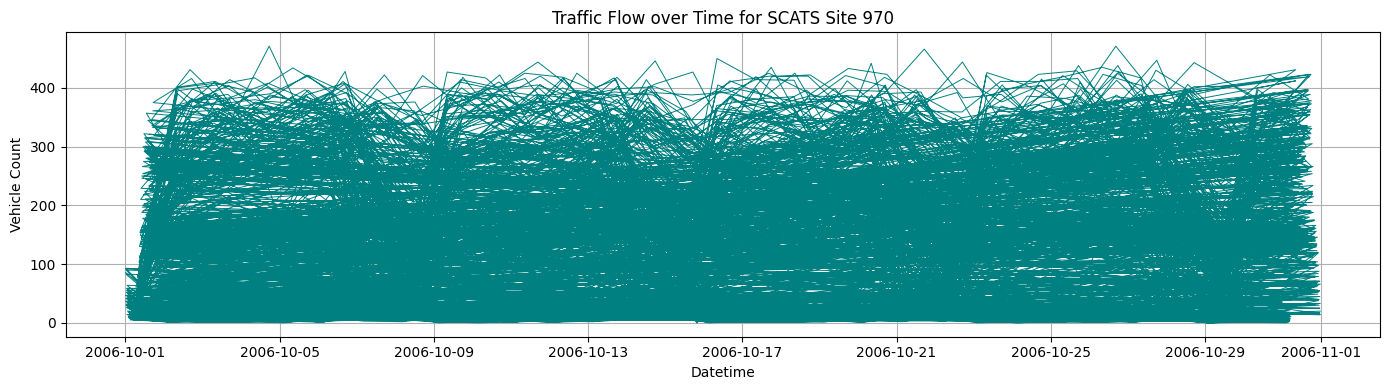

In [52]:
sample_site = df_melted['SCATS Number'].unique()[0]
site_df = df_melted[df_melted['SCATS Number'] == sample_site]

plt.figure(figsize=(14, 4))
plt.plot(site_df['Datetime'], site_df['Traffic_flow'], color='teal', linewidth=0.7)
plt.title(f"Traffic Flow over Time for SCATS Site {sample_site}")
plt.xlabel("Datetime")
plt.ylabel("Vehicle Count")
plt.grid(True)
plt.tight_layout()
plt.show()


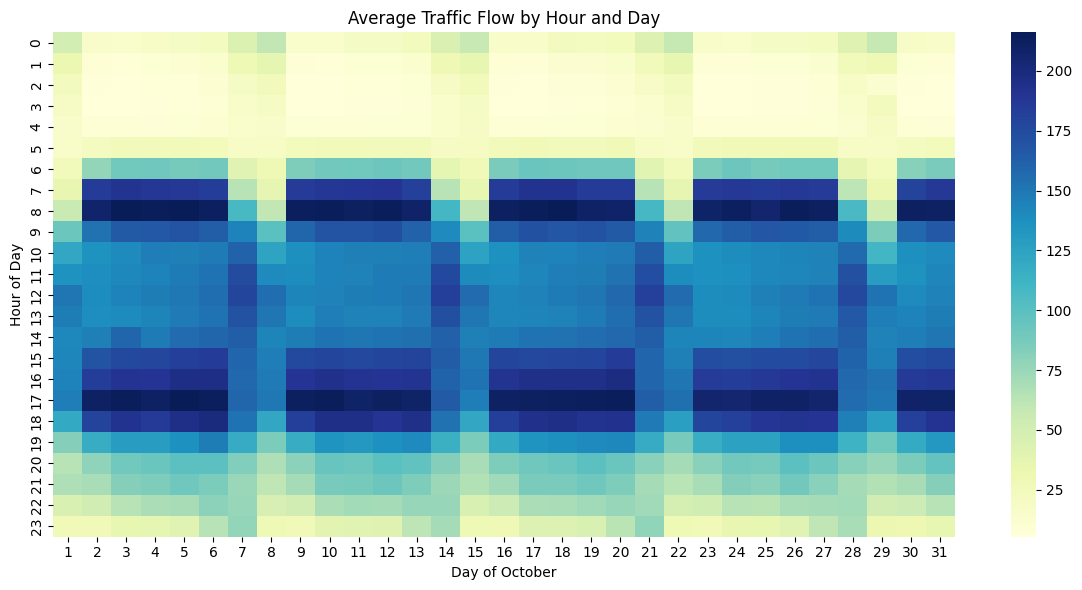

In [53]:
pivot_table = df_melted.pivot_table(
    index='Hour',
    columns='Day',
    values='Traffic_flow',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title("Average Traffic Flow by Hour and Day")
plt.xlabel("Day of October")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()
